# ***Jelly Fish DataSet***


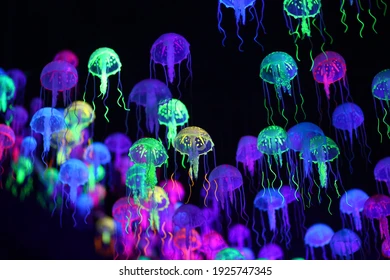

# Project Overview :

This dataset contains 900 images of jellyfish belonging to six different categories and species: mauve stinger jellyfish, moon jellyfish, barrel jellyfish, blue jellyfish, compass jellyfish, and lion’s mane jellyfish.

1 . **Moon jellyfish (Aurelia aurita):** Common jellyfish with four horseshoe-shaped gonads visible through the top of its translucent bell. It feeds by collecting medusae, plankton, and mollusks with its tentacles.

2 . **Barrel jellyfish (Rhizostoma pulmo):** Largest jellyfish found in British waters, with a bell that can grow up to 90 cm in diameter. It feeds on plankton and small fish by catching them in its tentacles.

3 . **Blue jellyfish (Cyanea lamarckii):** Large jellyfish that can grow up to 30 cm in diameter. It feeds on plankton and small fish by catching them in its tentacles.

4 . **Compass jellyfish (Chrysaora hysoscella):** Named after the brown markings on its bell that resemble a compass rose. It feeds on plankton and small fish by catching them in its tentacles.

5 . **Lion’s mane jellyfish (Cyanea capillata):** Largest jellyfish in the world, with a bell that can grow up to 2 meters in diameter and tentacles that can reach up to 30 meters in length. It feeds on plankton and small fish by catching them in its tentacles.

6 . **Mauve stinger (Pelagia noctiluca):** Small jellyfish with long tentacles and warty structures on its bell full of stinging cells. It feeds on other small jellyfish and oceanic sea squirts.

# 1 .Load Libraries

In [1]:
# import requirments

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 . Load Dataset

In [4]:
# import dataset

data = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/My_Projects/Jelly fish/Jelly_Fish_DataSet" ,
    labels="inferred" ,
    label_mode="int",
    class_names=None,
    color_mode="rgb" ,
    image_size=(224 ,224) ,
    batch_size=None ,
    seed=1

)

Found 900 files belonging to 6 classes.


In [5]:
# print class names

class_names = data.class_names
class_names

['Moon_jellyfish',
 'barrel_jellyfish',
 'blue_jellyfish',
 'compass_jellyfish',
 'lions_mane_jellyfish',
 'mauve_stinger_jellyfish']

# 3 . Visualise images

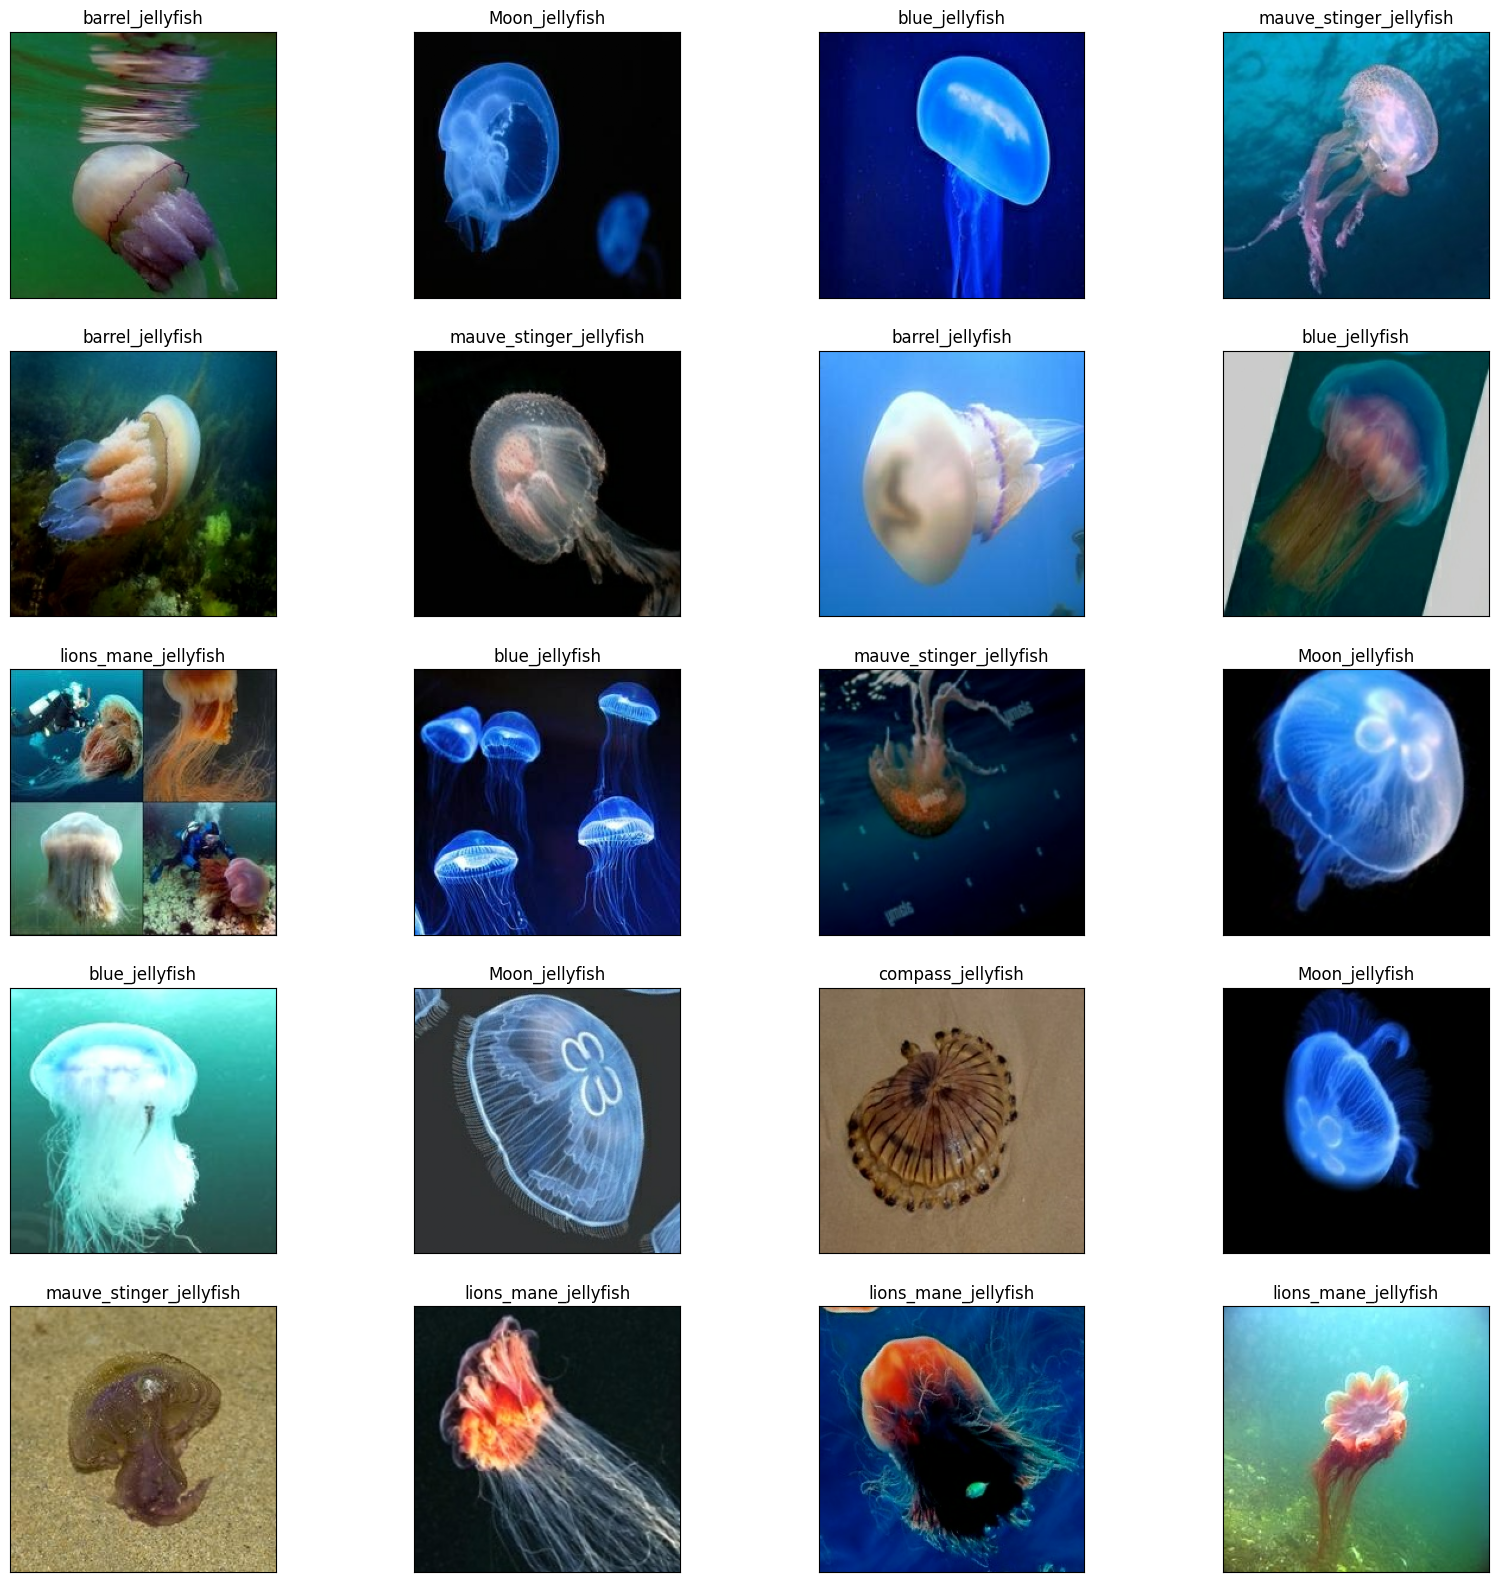

In [38]:
# prompt: show 10 images

fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(X_train.shape[0], size=20, replace=True)):
    ax = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[idx]))
    labels = np.argmax(y_train[idx])
    ax.set_title("{}".format(class_names[labels]))


# 4 . Data Preprocessing

In [7]:
X=[] # creating the empty list
y= [] # creating the empty list

for images, labels in data.batch(900):  # running loop for getting all image and labels of data
  for img, labels in zip(images, labels):   # ruuning loop
    X.append(img)   # appending image in X
    y.append(labels.numpy())  # appending labels in y

In [8]:
print(images.shape)

(900, 224, 224, 3)


In [9]:
# convert X and y list into array

X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(900, 224, 224, 3)

In [11]:
y.shape

(900,)

In [12]:
# rescale the images size

X = X.astype('float32') / 255

In [13]:
# One -Hot Encoding for labels

from tensorflow.keras.utils import to_categorical
y = to_categorical(y ,num_classes=len(class_names))

In [14]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
# divide the data into train and test

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X , y ,test_size=0.2 ,random_state=1)

In [16]:
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (720, 224, 224, 3)
y_train shape : (720, 6)
X_test shape : (180, 224, 224, 3)
y_test shape : (180, 6)


# 5 . create model architecture


In [17]:
# create model architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Flatten ,Dropout ,Dense

# create model

model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 , padding='same' ,activation='relu' ,kernel_initializer='he_uniform' ,input_shape=(224 ,224 ,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,activation='relu' ,kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,activation='relu' ,kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128 ,kernel_size=3 ,padding='same' ,activation='relu' ,kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256 ,kernel_size=3 ,padding='same' ,activation='relu' ,kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(300 , activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(6 ,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [18]:
# compile the model

model.compile(optimizer='adam' ,loss='categorical_crossentropy' ,metrics=['accuracy'])

# 6 . Train The Model

In [19]:
# import checkpointer

from tensorflow.keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.hdf5' ,
                                monitor='val_accuracy' ,
                                save_best_only=True ,
                                mode='max')

In [20]:
# train the model

history = model.fit(x=X_train ,
                    y=y_train ,
                    batch_size=32 ,
                    validation_split=0.1 ,
                    verbose=1 ,
                    shuffle=True ,
                    callbacks=[check_pointer] ,
                    epochs=70)

Epoch 1/70
21/21 [==============================] - 9s 113ms/step - loss: 1.7290 - accuracy: 0.2269 - val_loss: 1.5366 - val_accuracy: 0.3472
Epoch 2/70


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 1s 66ms/step - loss: 1.3886 - accuracy: 0.4460 - val_loss: 1.4520 - val_accuracy: 0.4167
Epoch 3/70
21/21 [==============================] - 1s 64ms/step - loss: 1.1953 - accuracy: 0.5216 - val_loss: 1.2687 - val_accuracy: 0.4583
Epoch 4/70
21/21 [==============================] - 1s 65ms/step - loss: 0.9883 - accuracy: 0.6157 - val_loss: 1.2921 - val_accuracy: 0.4722
Epoch 5/70
21/21 [==============================] - 1s 56ms/step - loss: 1.0054 - accuracy: 0.5895 - val_loss: 1.2421 - val_accuracy: 0.5139
Epoch 6/70
21/21 [==============================] - 1s 54ms/step - loss: 0.8388 - accuracy: 0.6914 - val_loss: 1.1538 - val_accuracy: 0.5972
Epoch 7/70
21/21 [==============================] - 1s 47ms/step - loss: 0.7023 - accuracy: 0.7284 - val_loss: 1.2014 - val_accuracy: 0.5694
Epoch 8/70
21/21 [==============================] - 1s 47ms/step - loss: 0.5732 - accuracy: 0.8040 - val_loss: 1.3605 - val_accuracy: 0.5278
Epoch 9/70
21/21 [======

In [21]:
## load the weights that yields best velidation accuracy

model.load_weights('model.weights.best.hdf5')

In [22]:
# check model performance

Score = model.evaluate(X_test ,y_test)
print(f"Score of the Model is : {100 * Score[1]}")

6/6 [==============================] - 1s 101ms/step - loss: 1.9840 - accuracy: 0.7444
Score of the Model is : 74.44444298744202


# 7 . Make Prediction

In [23]:
# make prediction on test data

y_hat = model.predict(X_test)
y_hat = (y_hat > 0.5)


6/6 [==============================] - 0s 20ms/step


In [24]:
y_hat

array([[False, False, False,  True, False, False],
       [False, False, False, False,  True, False],
       [False, False, False, False,  True, False],
       ...,
       [False, False, False, False,  True, False],
       [False, False,  True, False, False, False],
       [False, False, False, False,  True, False]])

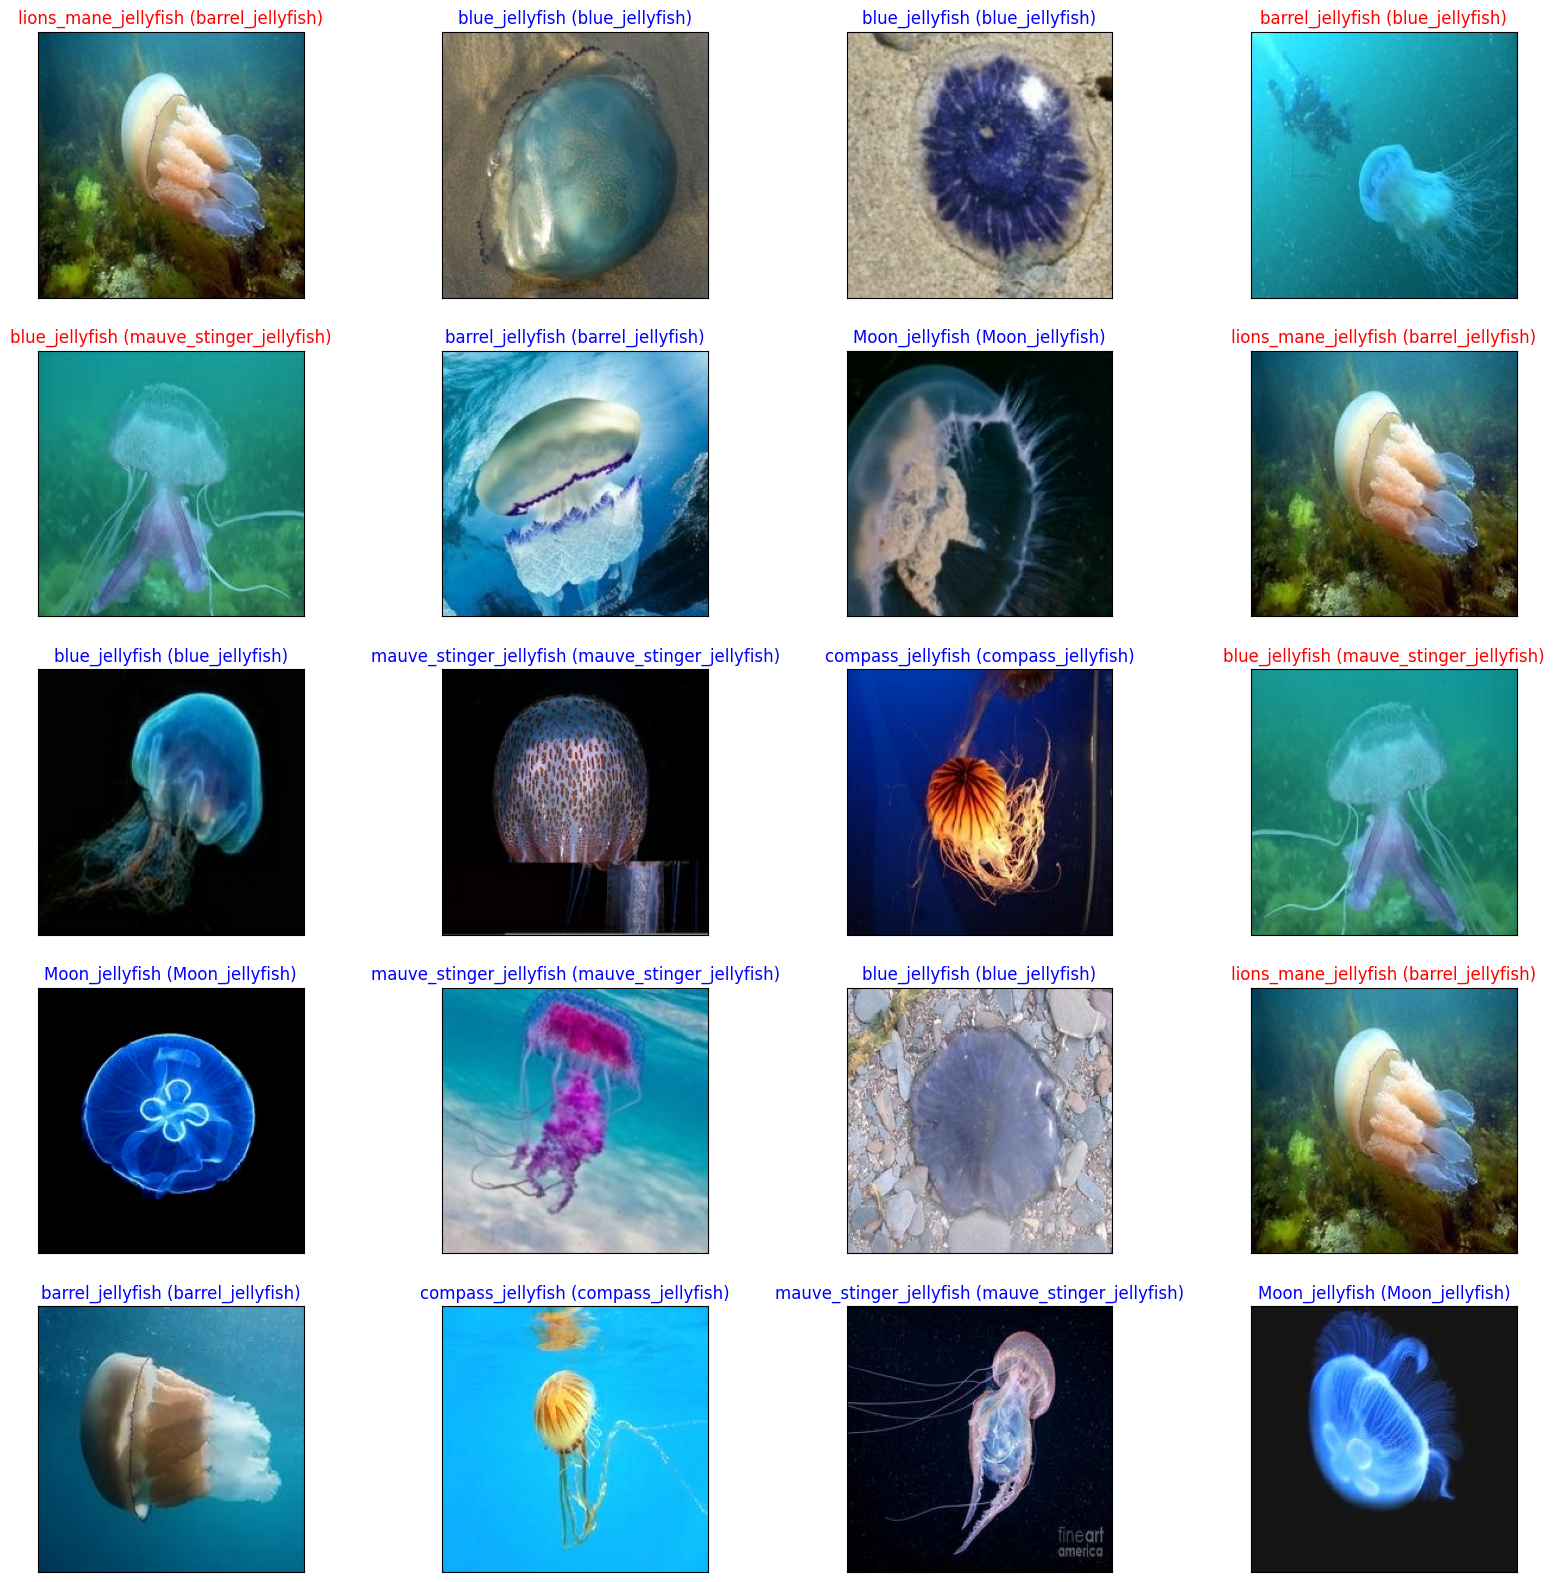

In [25]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=True)):
    ax = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [26]:
# prompt: print the classification report

from sklearn.metrics import classification_report ,accuracy_score
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.71      0.63      0.67        38
           2       0.72      0.69      0.71        26
           3       0.93      0.81      0.87        32
           4       0.74      0.84      0.79        31
           5       0.73      0.67      0.70        24

   micro avg       0.75      0.74      0.75       180
   macro avg       0.76      0.74      0.75       180
weighted avg       0.76      0.74      0.75       180
 samples avg       0.74      0.74      0.74       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

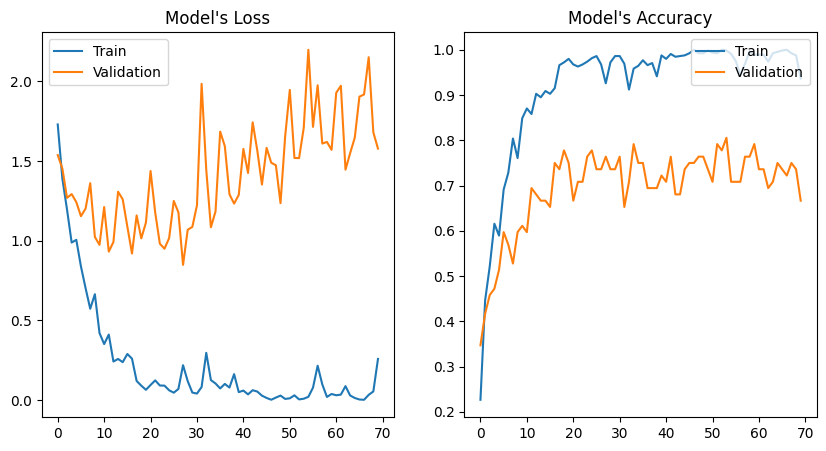

In [28]:
# visualise model's history

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Loss")
plt.legend(['Train' ,'Validation'] ,loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.legend(['Train' ,'Validation'] ,loc='upper right')

                             ______________________ END ______________________